<a href="https://colab.research.google.com/github/SweetlinN/Finance_loan_approval_prediction/blob/main/LoanApproval_predict_Ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1.import library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import   RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [6]:
# 2.load dataset

In [7]:

from google.colab import files
files.upload()

Saving Finance.csv to Finance.csv


{'Finance.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y\nLP001029,Male,No,0,Graduat

In [8]:
DF = pd.read_csv('Finance.csv')

In [9]:
# first five rows of the dataset

In [10]:
DF.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [11]:
# last five rows of the dataset

In [12]:
DF.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [13]:
# 3.(EDA) Read and Explore the data

In [14]:
DF.shape

(614, 13)

In [15]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
DF.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
# 4.missing value imputation

In [18]:
# 1. Gender

In [19]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='count'>

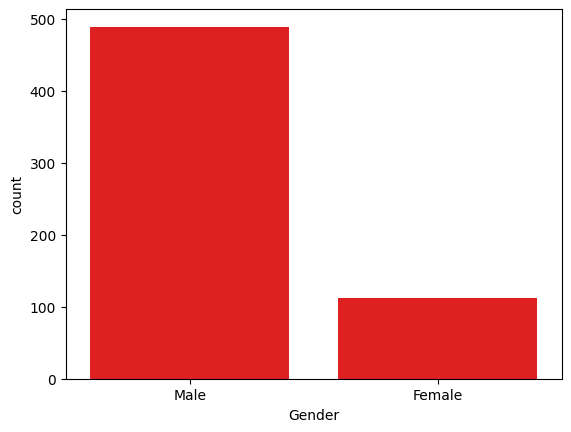

In [ ]:
sns.countplot(x=DF['Gender'],color='red')

In [20]:
DF['Gender'].mode()[0]

'Male'

In [21]:
DF['Gender'] = DF['Gender'].fillna(DF['Gender'].mode()[0])

In [22]:
#2.Married

<Axes: xlabel='Married', ylabel='count'>

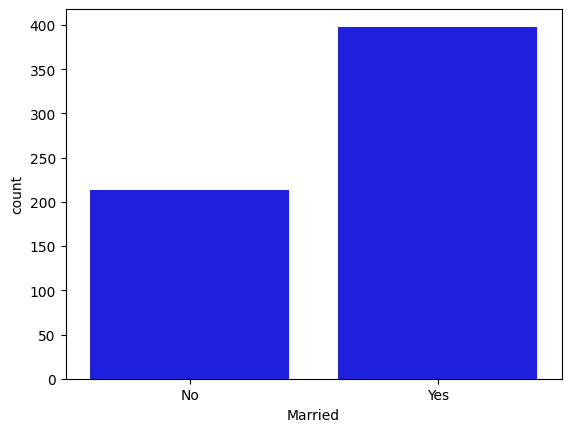

In [23]:
sns.countplot(x= DF['Married'],color='blue')

In [24]:
DF['Married'].mode()[0]

'Yes'

In [25]:
DF['Married'] = DF['Married'].fillna(DF['Married'].mode()[0])

In [26]:
#3.Dependents

<Axes: xlabel='Dependents', ylabel='count'>

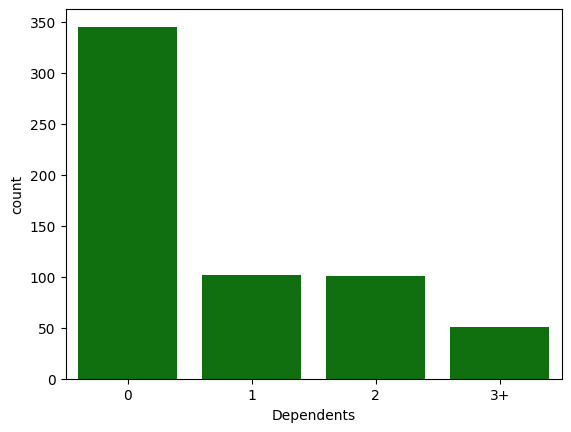

In [27]:
sns.countplot(x=DF['Dependents'],color ='green')

In [28]:
DF['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [29]:
DF['Dependents'].mode()[0]

'0'

In [30]:

DF['Dependents'] = DF['Dependents'].fillna(DF['Dependents'].mode()[0])

In [ ]:
#4.Self_Employed

<Axes: xlabel='Self_Employed', ylabel='count'>

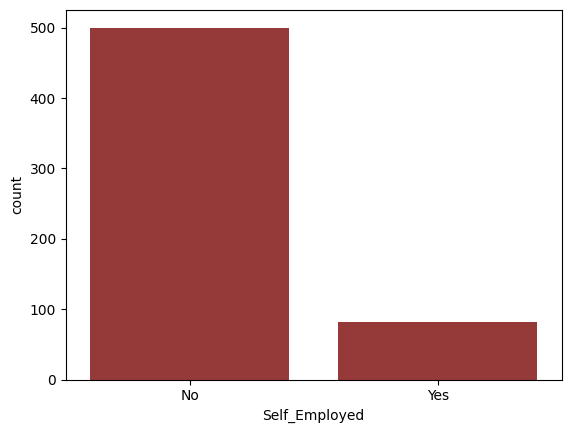

In [31]:

sns.countplot(x = DF['Self_Employed'],color='brown')

In [32]:
DF['Self_Employed'].mode()[0]

'No'

In [33]:
DF['Self_Employed'] = DF['Self_Employed'].fillna(DF['Self_Employed'].mode()[0])

In [34]:
#5.LoanAmount

In [35]:
DF['LoanAmount'].median()

128.0

In [36]:
DF['LoanAmount'] = DF['LoanAmount'].fillna(DF['LoanAmount'].median())

In [ ]:
#6.Loan_Amount_Term

In [37]:
DF['Loan_Amount_Term'].median()

360.0

In [38]:
DF['Loan_Amount_Term'] = DF['Loan_Amount_Term'].fillna(DF['Loan_Amount_Term'].median())

In [39]:
# 7.Credit_History

<Axes: xlabel='Credit_History', ylabel='count'>

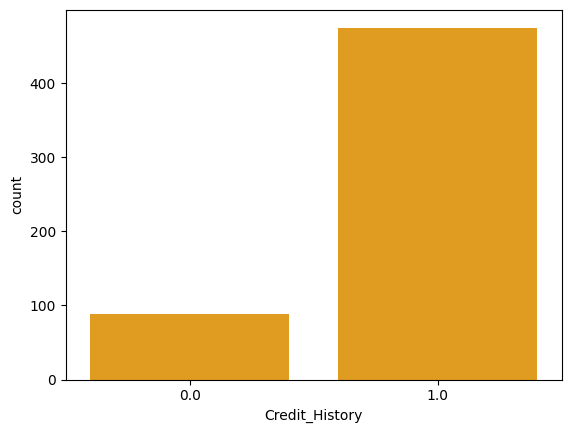

In [40]:
sns.countplot(x = DF ['Credit_History'],color='orange')

In [41]:
DF['Credit_History'].mode()[0]

np.float64(1.0)

In [42]:
DF['Credit_History'] = DF['Credit_History'].fillna(DF['Credit_History'].mode()[0])

In [43]:
DF.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [44]:
# Step : 4 Feature creation

In [45]:
DF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
DF.replace({
    "Loan_Status": {'N': 0, 'Y': 1},
    "Gender": {'Male': 0, 'Female': 1},
    "Education": {'Not Graduate': 0, 'Graduate': 1},
    "Married": {'No': 0, 'Yes': 1},
    "Self_Employed": {'No': 0, 'Yes': 1}
}, inplace=True)

/tmp/ipython-input-3591059533.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF.replace({


In [ ]:
DF['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [47]:
DF=DF.replace(to_replace='3+',value=4)

In [48]:
DF

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [49]:
# Step 5 : Train Test split the data

In [50]:

X = DF.drop(['Loan_ID','Education','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area','Loan_Status'],axis=1)
y = DF['Loan_Status']

In [52]:
features = X.columns.to_list()

In [53]:
print(len(features))

6


In [54]:
X

,Gender,Married,Dependents,Self_Employed,LoanAmount,Credit_History
0,0,0,0,0,128.0,1.0
1,0,1,1,0,128.0,1.0
2,0,1,0,1,66.0,1.0
3,0,1,0,0,120.0,1.0
4,0,0,0,0,141.0,1.0
...,...,...,...,...,...,...
609,1,0,0,0,71.0,1.0
610,0,1,4,0,40.0,1.0
611,0,1,1,0,253.0,1.0
612,0,1,2,0,187.0,1.0


In [55]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
# 6.evalauate model Training and metrics

In [57]:
# 1.RandomForestClassifier

In [58]:
RF_CLF = RandomForestClassifier()
RF_CLF.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
from sklearn import metrics
y_pred = RF_CLF.predict(X_test)

print("accuracy of RandomForestClassifier is % ", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of RandomForestClassifier is %  0.7317073170731707


array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
# 2. Logistic Regression

In [60]:
Logis_reg = LogisticRegression()
Logis_reg.fit(X_train,y_train)

LogisticRegression()

In [61]:
from sklearn import metrics
y_pred = Logis_reg.predict(X_test)

print("accuracy of LogisticRegression is % ", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of LogisticRegression is %  0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
# 3 decision tree classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
DT_CLF = DecisionTreeClassifier()
DT_CLF.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics
y_pred = DT_CLF.predict(X_test)

print("accuracy of DecisionTreeClassifier is %.", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of DecisionTreeClassifier is %. 0.6585365853658537


array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
# save the model

In [63]:
import joblib

In [64]:
joblib.dump(Logis_reg,"loan_Approval_predict.pkl")

['loan_Approval_predict.pkl']

In [65]:
model = joblib.load('loan_Approval_predict.pkl')

In [66]:
joblib.dump(features,'features.pkl')

['features.pkl']

In [67]:
features1 = joblib.load('features.pkl')

In [68]:
model = joblib.load("loan_Approval_predict.pkl")

sample_prediction = model.predict(X_test)
print("✅ loaded_Logis_reg works! Example prediction:", sample_prediction)

✅ loaded_Logis_reg works! Example prediction: [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [70]:
# AUC-ROC curve - 3 algorithms

In [87]:
# 1.Import required libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [88]:
# 2. Get predicted probabilities
# Random Forest
y_prob_rf = RF_CLF.predict_proba(X_test)[:, 1]

# Logistic Regression
y_prob_lr = Logis_reg.predict_proba(X_test)[:, 1]

# Decision Tree
y_prob_dt = DT_CLF.predict_proba(X_test)[:, 1]

In [85]:
# 3.Compute ROC curve & AUC for each model

In [86]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [76]:

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

In [89]:
# 4.Plot ROC curves together

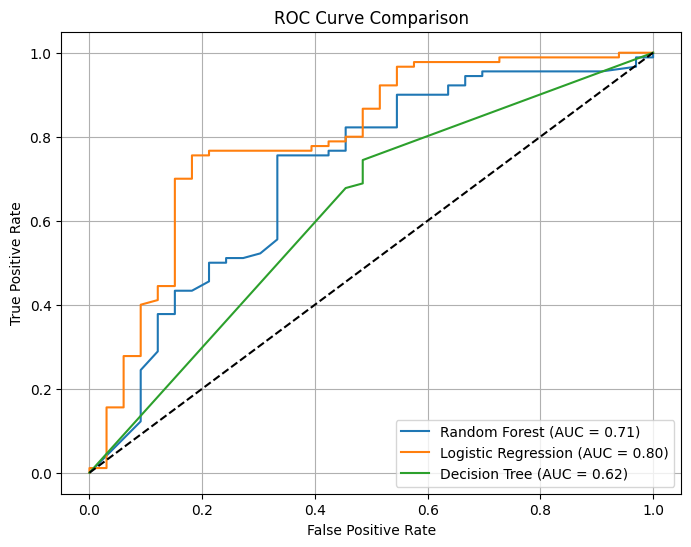

In [78]:

plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [91]:
# 5. Print AUC scores only (optional)

In [82]:

print("AUC Random Forest:", auc_rf)
print("AUC Logistic Regression:", auc_lr)
print("AUC Decision Tree:", auc_dt)

AUC Random Forest: 0.7102693602693603
AUC Logistic Regression: 0.7964646464646465
AUC Decision Tree: 0.624074074074074
